<a href="https://colab.research.google.com/github/reitezuz/notebooks-for-NES2-2024/blob/main/lecture_09/Xception_cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XCeption-like Convolutional Neural Network - classifying images from the Dogs vs. Cats Dataset

Inspired by: https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/chapter08_intro-to-dl-for-computer-vision.ipynb

The Dogs vs. Cats dataset is a collection of images for binary image classification. It contains a training set of labeled images of cats and dogs, originally used in a Kaggle competition (2013). Each image is a color photo. The dataset provides a challenging problem of distinguishing between two visually similar categories and is widely used for experimenting with convolutional neural networks.

You can download the dataset from the following sources:
- https://www.kaggle.com/c/dogs-vs-cats
- https://www.microsoft.com/en-us/download/details.aspx?id=54765

We will work with a smaller dataset available at:
- http://zuzka.petricek.net/vyuka_2024/NES2_2024/data/cats_vs_dogs_small.zip

1. Download the zip file with the data
2. Extract the zip file

In [1]:
import requests
import zipfile
import os

zip_path = "cats_vs_dogs_small.zip"
url = "http://zuzka.petricek.net/vyuka_2024/NES2_2024/data/cats_vs_dogs_small.zip"
output_folder = "."

#base_folder ="cats_vs_dogs_small/"

# Download the zip file
response = requests.get(url)

# Save the zip file locally
with open(zip_path, "wb") as file:
    file.write(response.content)

# Extract the zip file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(output_folder)

# Clean up by removing the downloaded zip file
os.remove(zip_path)



### The format (structure) of the folder with data:
- the root folder contains three subdirectories: `train` (2000 images), `validation` (1000 images), and `test` (2000 images). The folders represent the essential division of the dataset into training, validation, and testing sets.
- within each of these directories, images for separate classes are stored in distinct subdirectories. This enables Keras to automatically identify class labels based on folder names
- the given format of the folder is required by Keras function `image_dataset_from_directory(directory)`

### Create Datasets from folders
- **`image_dataset_from_directory(directory)`**:
  1. Assumes the folder structure follows the format: class-specific subfolders within `train`, `validation`, and `test` directories.
  2. Scans and indexes image files in each subdirectory, automatically assigning labels based on folder names.
  3. Returns a `tf.data.Dataset` object, configured to:
     - Load and shuffle the files,
     - Decode images into tensors,
     - Resize images to a consistent size,
     - Batch images for efficient model training.

In [2]:
base_folder ="cats_vs_dogs_small/"

from keras.utils import image_dataset_from_directory

image_size = (180, 180)
train_dataset = image_dataset_from_directory(
    base_folder + "train",
    image_size=image_size,
    seed=42,
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    base_folder  + "validation",
    image_size=image_size,
    seed=42,
    batch_size=32)
test_dataset = image_dataset_from_directory(
    base_folder  + "test",
    image_size=image_size,
    shuffle = False,
    seed=42,
    batch_size=32)



Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


- `tf.data.Dataset` is an iterator:

In [3]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break
for data_batch, labels_batch in validation_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)
data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [4]:
# Data frame for results
import pandas as pd

columns = ["Model Name", "Details", "Test Accuracy", "Test Loss", "Train Accuracy", "Train Loss"]
results_df = pd.DataFrame(columns=columns)

## Train the xception-like model

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 180, 180, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 180, 180, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 180, 180, 3)    │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 176, 176, 32)   │          2,400 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 176, 176, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 176, 176, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d          │ (None, 176, 176, 32)   │          1,312 │ activation[0][0]       │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 176, 176, 32)   │            128 │ separable_conv2d[0][0] │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 176, 176, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_1        │ (None, 176, 176, 32)   │          1,312 │ activation_1[0][0]     │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 88, 88, 32)     │              0 │ separable_conv2d_1[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 88, 88, 32)     │          1,024 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 88, 88, 32)     │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 88, 88, 32)     │            128 │ add[0][0]              │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 88, 88, 32)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ separable_conv2d_2        │ (None, 88, 88, 64)     │          2,336 │ activation_2[0][0]     │
│ (SeparableConv2D)    

 Total params: 721,857 (2.75 MB)

 Trainable params: 718,849 (2.74 MB)

 Non-trainable params: 3,008 (11.75 KB)

Epoch 1/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 36s 260ms/step - accuracy: 0.5688 - loss: 0.7020 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 2/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.6026 - loss: 0.6716 - val_accuracy: 0.5200 - val_loss: 0.6912
Epoch 3/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - accuracy: 0.6144 - loss: 0.6409 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 4/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 206ms/step - accuracy: 0.6512 - loss: 0.6325 - val_accuracy: 0.5000 - val_loss: 0.7308
Epoch 5/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.6623 - loss: 0.6235 - val_accuracy: 0.5000 - val_loss: 0.7678
Epoch 6/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - accuracy: 0.6723 - loss: 0.6082 - val_accuracy: 0.5000 - val_loss: 0.8926
Epoch 7/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.7038 - loss: 0.5820 - val_accuracy: 0.5360 - val_loss: 0.8312
Epoch 8/100
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 211ms/step - accuracy: 0.7448 - loss: 0.5479 - 

<ipython-input-6-1b3d4896eeb4>:120: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame([new_entry])], ignore_index=True)


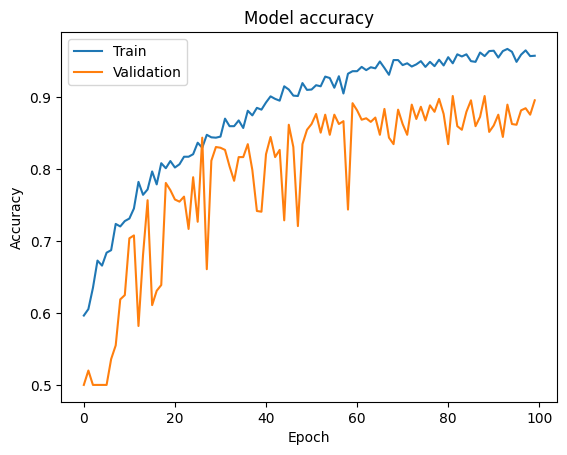

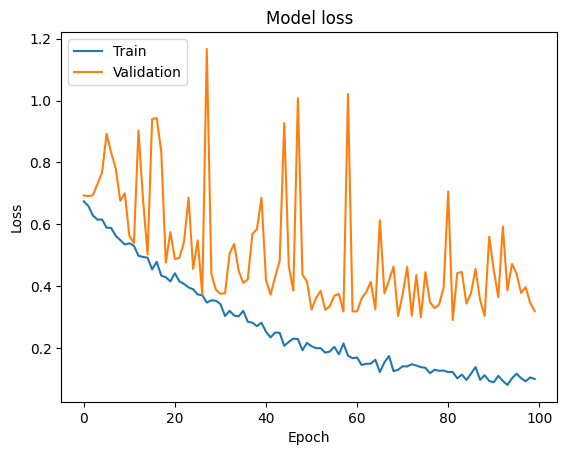

In [6]:
###############################################
# Define the log directory for TensorBoard
import os
import datetime
import keras
import tensorflow as tf

model_datetime_name = "cats_dogs_cnn_xception"+  datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "./logs/fit_cd/" + model_datetime_name
# print(os.getcwd())

# Clear any logs from previous runs
# !rm -rf ./logs/

# Ensure the directory exists
if not os.path.exists(os.path.dirname(log_dir)):
    os.makedirs(os.path.dirname(log_dir))

###############################################
# Initialize Tensorboard callback
tensorboard_callback = keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,  # Visualize histograms of layer weights
    write_graph=True,  # Log the graph to visualize the model structure
    write_images=True  # Optionally, save images of weights and activation histograms
    # update_freq='batch'  # Log metrics after every batch
    # write_steps_per_second=True  # Log steps per second during training
)
################################################


# Define the model architecture

import keras
from keras import layers

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=image_size + (3, ))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

# Set model parameters
model.compile(optimizer= keras.optimizers.Adam(), # SGD, Adam, RMSProp
              loss= keras.losses.BinaryCrossentropy(),
              metrics= [keras.metrics.BinaryAccuracy("accuracy")])

num_epochs = 100

checkpoint =     keras.callbacks.ModelCheckpoint(
        filepath="models/xception_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")


early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

history = model.fit(
    train_dataset,
    epochs=num_epochs,
    validation_data=validation_dataset,
    callbacks=[tensorboard_callback, checkpoint])
    #callbacks=[tensorboard_callback, early_stopping])

model = keras.models.load_model("models/xception_from_scratch_with_augmentation.keras")

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(train_dataset)
print('Training accuracy:', train_acc, '\nTrain loss:', train_loss)

# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(validation_dataset)
print('Validation accuracy:', val_acc, '\nVal loss:', val_loss)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print('Test accuracy:', test_acc, '\nTest loss:', test_loss)

model_details = "augmented xception"
# Add results to the dataframe:
new_entry = {
    "Model Name" : model_datetime_name,
    "Details" : model_details,
    "Test Accuracy" : test_acc,
    "Test Loss" : test_loss,
    "Train Accuracy" : train_acc,
    "Train Loss" : test_loss,
}
results_df = pd.concat([results_df, pd.DataFrame([new_entry])], ignore_index=True)

model_dir = "./models/"
if not os.path.exists(os.path.dirname(model_dir)):
    os.makedirs(os.path.dirname(model_dir))
# View and and save the dataframe:
print("Results:")
print(results_df)
results_df.to_csv(model_dir + "mnist_xception_results.csv", index=False)

# plot the training progress:
import matplotlib.pyplot as plt

history_dict = history.history
print(history_dict.keys())

# Plot training & validation accuracy values
plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Predicted labels: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
True labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Number of misclassified images: 222 out of 2000 , accuracy: 0.889


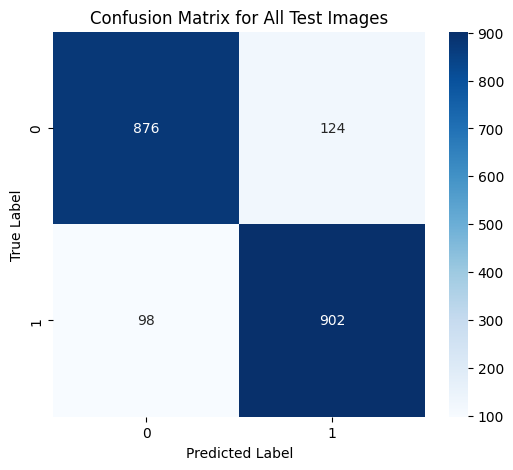

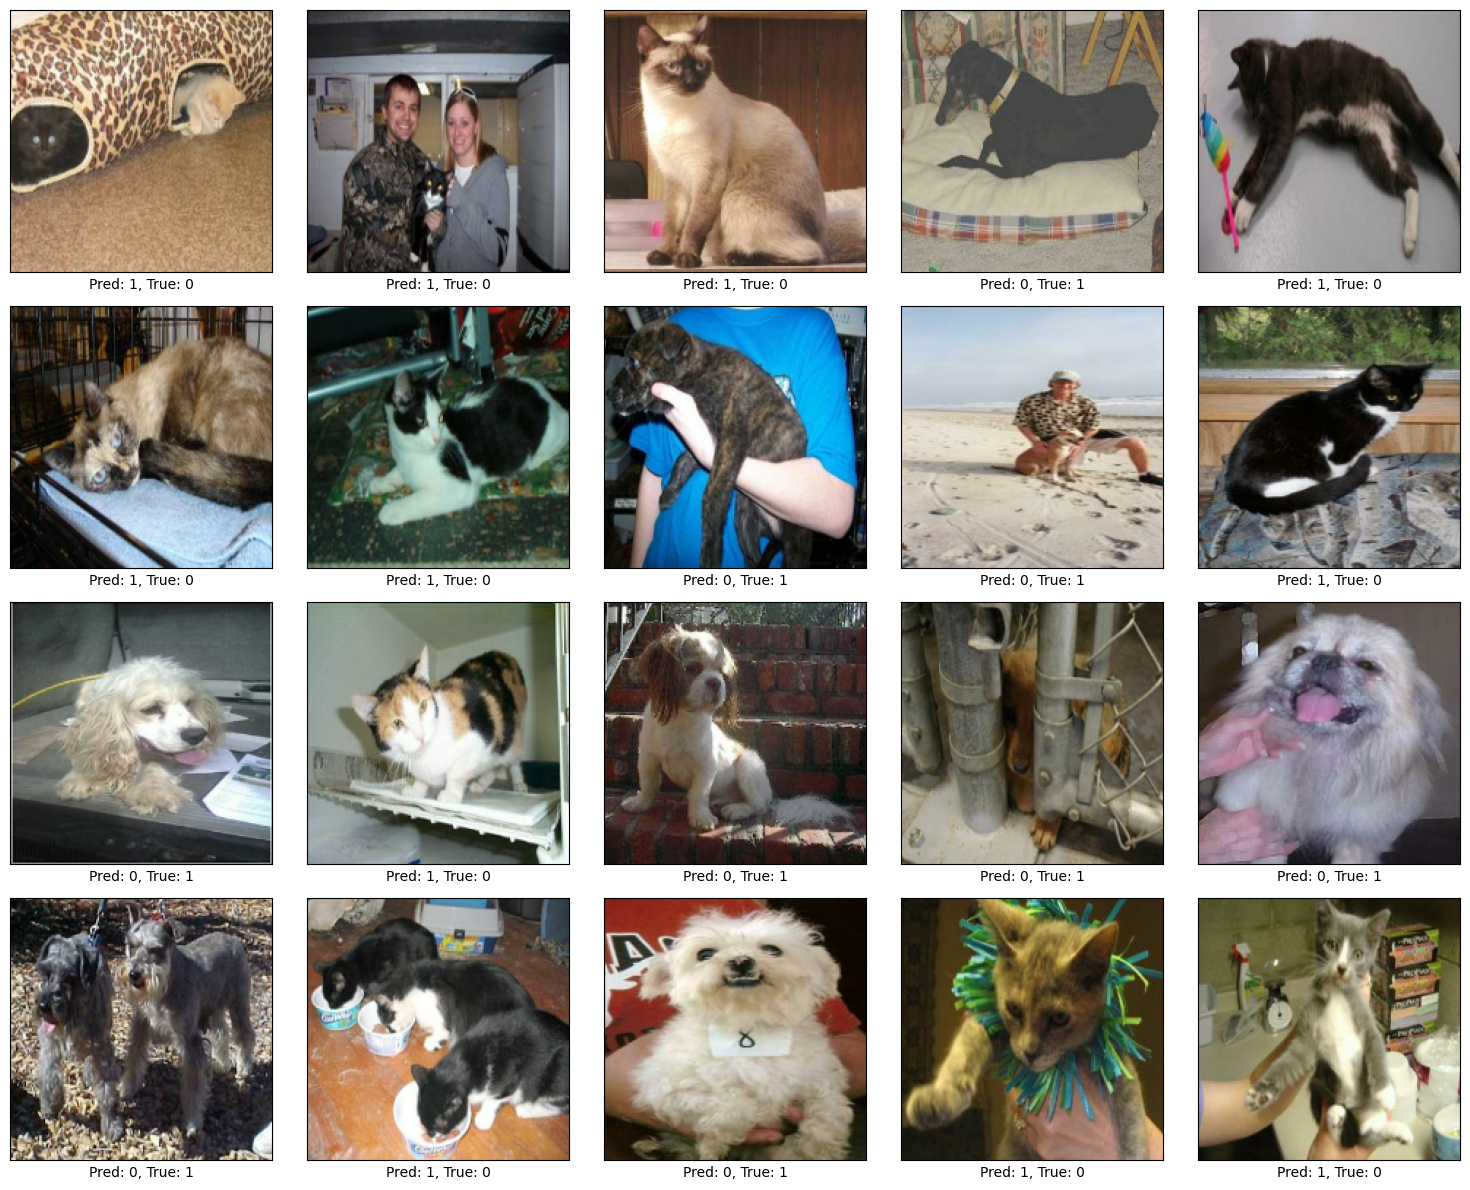

In [7]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

y_true = []
y_pred = []
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []


for images, labels in test_dataset:
    preds = model.predict(images, verbose=False)
    preds = tf.round(preds).numpy().flatten()
    y_true.extend(labels.numpy())
    y_pred.extend(preds)


    for i in range(len(images)):
        if preds[i] != labels[i].numpy():  # Chybně klasifikováno
            misclassified_images.append(images[i].numpy())
            misclassified_labels.append(labels[i].numpy())
            misclassified_predictions.append(int(preds[i]))

print("Predicted labels:", y_pred[:10])
print("True labels:", y_true[:10])

y_true = np.array(y_true)
y_pred = np.array(y_pred)
misclassified_images = np.array(misclassified_images)
misclassified_labels = np.array(misclassified_labels)
misclassified_predictions = np.array(misclassified_predictions)

# Calculate the number of misclassified images
misclassified_indices = np.where(y_pred != y_true)[0]
num_misclassified = len(misclassified_indices)
test_acc = (len(y_true) - num_misclassified) / len(y_true)
print("Number of misclassified images:", num_misclassified,
      "out of", len(y_true), ", accuracy:", test_acc)

# plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for All Test Images')
plt.show()

# plot some misclassified images
num_images_to_plot = 20
random_indices = random.sample(range(len(misclassified_images)), min(num_images_to_plot, len(misclassified_images)))

plt.figure(figsize=(15, 12))
for i, index in enumerate(random_indices):
    plt.subplot(4, 5, i + 1)  # 4 řádky, 5 sloupců
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(misclassified_images[index].astype("uint8"))
    plt.xlabel(f"Pred: {misclassified_predictions[index]}, True: {misclassified_labels[index]}")
plt.tight_layout()
plt.show()


In [ ]:
###############################################
# Load TensorBoard notebook extension
%load_ext tensorboard

# Start TensorBoard before training begins
%tensorboard --logdir logs/fit_cd --reload_interval=1